<a href="https://colab.research.google.com/github/cepdnaclk/e19-co544-Bitcoin-Cost-Forecast-System/blob/main/Models/Multivariate_LSTM_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [34]:
import yfinance as yf
import pandas as pd

# Define the ticker simbol for Bitcoin
ticker = 'BTC-USD'

# Get historical market data
hist = yf.Ticker(ticker).history(period="max")

# Making the 'Date' as the index
hist.index = pd.to_datetime(hist.index)

# Drop the "Dividends" column and "Stock Splits" column
hist.drop(columns = ['Dividends', 'Stock Splits'], inplace = True)

# Print the data
print(hist.head())

                                 Open        High         Low       Close  \
Date                                                                        
2014-09-17 00:00:00+00:00  465.864014  468.174011  452.421997  457.334015   
2014-09-18 00:00:00+00:00  456.859985  456.859985  413.104004  424.440002   
2014-09-19 00:00:00+00:00  424.102997  427.834991  384.532013  394.795990   
2014-09-20 00:00:00+00:00  394.673004  423.295990  389.882996  408.903992   
2014-09-21 00:00:00+00:00  408.084991  412.425995  393.181000  398.821014   

                             Volume  
Date                                 
2014-09-17 00:00:00+00:00  21056800  
2014-09-18 00:00:00+00:00  34483200  
2014-09-19 00:00:00+00:00  37919700  
2014-09-20 00:00:00+00:00  36863600  
2014-09-21 00:00:00+00:00  26580100  


# Set Inputs and Outputs

In [35]:
X, y = hist.drop(columns = ['Close']), hist.Close.values
X.shape, y.shape

((3541, 4), (3541,))

## Standardize Features

In [36]:
# Import the StandardScaler and MinMaxScaler classes from the sklearn.preprocessing module
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Create an instance of thee MinMaxScaler, which scales the data to a specified range (default is 0 to 1)
mm = MinMaxScaler()

# Creating an instance of the standardScaler, which standardizes the data by removing the mean and scaling to unit variance
ss = StandardScaler()

# Applying the StandardScaler to the feature matrix X to standardize the features
# fit_transform() first fits the scaler to the data (calculating the mean and standard deviation) and then transforms the data
X_trans = ss.fit_transform(X)

# Reshaping the target variable y to be a 2D array with one column, as required by the MinMaxScaler
# fit_transform() first fits the scaler to the data (calculating the min and max values) and then transforms the data
y_trans = mm.fit_transform(y.reshape(-1, 1))

## Split a multivariate sequence past, future samples (X abd y)

In [37]:
import numpy as np

# split a multivariate sequence past, future samples (X and y)
def split_sequences(input_sequences, output_sequence, n_steps_in, n_steps_out):

    X, y = list(), list() # instantiate X and y

    for i in range(len(input_sequences)):

        # find the end of the input, output sequence
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out - 1

        # check if we are beyond the dataset
        if out_end_ix > len(input_sequences): break

        # gather input and output of the pattern
        seq_x, seq_y = input_sequences[i:end_ix], output_sequence[end_ix-1:out_end_ix, -1]
        X.append(seq_x), y.append(seq_y)

    return np.array(X), np.array(y)

X_ss, y_mm = split_sequences(X_trans, y_trans, 100, 50)
print(X_ss.shape, y_mm.shape)

(3393, 100, 4) (3393, 50)


## Check the y_mm sample

In [38]:
print("y_mm[0]:", y_mm[0])
print("y_trans[99:149].squeeze(1):", y_trans[99:149].squeeze(1))

assert y_mm[0].all() == y_trans[99:149].squeeze(1).all()

y_mm[0]

y_mm[0]: [0.00193271 0.00205501 0.00188957 0.00190845 0.00184578 0.00181926
 0.00194896 0.00186743 0.00187817 0.0014125  0.00118087 0.00132186
 0.00148255 0.00159431 0.0014436  0.00154042 0.00132628 0.00120097
 0.00123027 0.00065507 0.         0.00043537 0.00041141 0.0002902
 0.00044216 0.00050419 0.00045555 0.00066928 0.00075856 0.00075133
 0.00095664 0.00103717 0.00130813 0.001171   0.00076554 0.00076003
 0.0006628  0.00053989 0.00067031 0.00082471 0.00067437 0.00066867
 0.00053505 0.00060576 0.00068103 0.00062148 0.00057619 0.00057247
 0.0005635  0.00059887]
y_trans[99:149].squeeze(1): [0.00193271 0.00205501 0.00188957 0.00190845 0.00184578 0.00181926
 0.00194896 0.00186743 0.00187817 0.0014125  0.00118087 0.00132186
 0.00148255 0.00159431 0.0014436  0.00154042 0.00132628 0.00120097
 0.00123027 0.00065507 0.         0.00043537 0.00041141 0.0002902
 0.00044216 0.00050419 0.00045555 0.00066928 0.00075856 0.00075133
 0.00095664 0.00103717 0.00130813 0.001171   0.00076554 0.00076003
 0.

array([0.00193271, 0.00205501, 0.00188957, 0.00190845, 0.00184578,
       0.00181926, 0.00194896, 0.00186743, 0.00187817, 0.0014125 ,
       0.00118087, 0.00132186, 0.00148255, 0.00159431, 0.0014436 ,
       0.00154042, 0.00132628, 0.00120097, 0.00123027, 0.00065507,
       0.        , 0.00043537, 0.00041141, 0.0002902 , 0.00044216,
       0.00050419, 0.00045555, 0.00066928, 0.00075856, 0.00075133,
       0.00095664, 0.00103717, 0.00130813, 0.001171  , 0.00076554,
       0.00076003, 0.0006628 , 0.00053989, 0.00067031, 0.00082471,
       0.00067437, 0.00066867, 0.00053505, 0.00060576, 0.00068103,
       0.00062148, 0.00057619, 0.00057247, 0.0005635 , 0.00059887])

In [39]:
y_trans[99:149].squeeze(1)

array([0.00193271, 0.00205501, 0.00188957, 0.00190845, 0.00184578,
       0.00181926, 0.00194896, 0.00186743, 0.00187817, 0.0014125 ,
       0.00118087, 0.00132186, 0.00148255, 0.00159431, 0.0014436 ,
       0.00154042, 0.00132628, 0.00120097, 0.00123027, 0.00065507,
       0.        , 0.00043537, 0.00041141, 0.0002902 , 0.00044216,
       0.00050419, 0.00045555, 0.00066928, 0.00075856, 0.00075133,
       0.00095664, 0.00103717, 0.00130813, 0.001171  , 0.00076554,
       0.00076003, 0.0006628 , 0.00053989, 0.00067031, 0.00082471,
       0.00067437, 0.00066867, 0.00053505, 0.00060576, 0.00068103,
       0.00062148, 0.00057619, 0.00057247, 0.0005635 , 0.00059887])

## Split Training & Test Sets

In [40]:
total_samples = len(X)
train_test_cutoff = round(0.90 * total_samples)

X_train = X_ss[:-150]
X_test = X_ss[-150:]

y_train = y_mm[:-150]
y_test = y_mm[-150:]

print("Training Shape:", X_train.shape, y_train.shape)
print("Testing Shape:", X_test.shape, y_test.shape)

Training Shape: (3243, 100, 4) (3243, 50)
Testing Shape: (150, 100, 4) (150, 50)


## Convert Data Into Tensors

In [41]:
import torch

# convert to pytorch tensors
X_train_tensors = torch.Tensor(X_train).requires_grad_(True)
X_test_tensors = torch.Tensor(X_test).requires_grad_(True)

y_train_tensors = torch.Tensor(y_train).requires_grad_(True)
y_test_tensors = torch.Tensor(y_test).requires_grad_(True)


## Reshaping to rows, timestamps, features

In [42]:
# reshaping to rows, timestamps, features
X_train_tensors_final = torch.reshape(X_train_tensors,
                                      (X_train_tensors.shape[0], 100,
                                       X_train_tensors.shape[2]))
X_test_tensors_final = torch.reshape(X_test_tensors,
                                     (X_test_tensors.shape[0], 100,
                                      X_test_tensors.shape[2]))

print("Training Shape:", X_train_tensors_final.shape, y_train_tensors.shape)
print("Testing Shape:", X_test_tensors_final.shape, y_test_tensors.shape)

Training Shape: torch.Size([3243, 100, 4]) torch.Size([3243, 50])
Testing Shape: torch.Size([150, 100, 4]) torch.Size([150, 50])


In [43]:
X_check, y_check = split_sequences(X, y.reshape(-1, 1), 100, 50)
X_check[-1][0:4]

X.iloc[-149:-145]

,Open,High,Low,Volume
Date,,,,
2023-12-31 00:00:00+00:00,42152.097656,42860.937500,41998.253906,16397498810
2024-01-01 00:00:00+00:00,42280.234375,44175.437500,42214.976562,18426978443
2024-01-02 00:00:00+00:00,44187.140625,45899.707031,44176.949219,39335274536
2024-01-03 00:00:00+00:00,44961.601562,45503.242188,40813.535156,46342323118


from matplotlib import pyplot as plt
_df_0['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['High'].plot(kind='hist', bins=20, title='High')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Low'].plot(kind='hist', bins=20, title='Low')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Volume'].plot(kind='hist', bins=20, title='Volume')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Open', y='High', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Low', y='Volume', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Open']
  ys = series['High']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('Open', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Open')
_ = plt.ylabel('High')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Open']
  ys = series['Low']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Open', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Open')
_ = plt.ylabel('Low')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Open']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Open'}, axis=1)
              .sort_values('Open', ascending=True))
  xs = counted['Open']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Open', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Open')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Volume']
  ys = series['High']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Volume', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Volume')
_ = plt.ylabel('High')

from matplotlib import pyplot as plt
_df_11['Open'].plot(kind='line', figsize=(8, 4), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['High'].plot(kind='line', figsize=(8, 4), title='High')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Low'].plot(kind='line', figsize=(8, 4), title='Low')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Volume'].plot(kind='line', figsize=(8, 4), title='Volume')
plt.gca().spines[['top', 'right']].set_visible(False)

In [44]:
y_check[-1]

array([71631.359375  , 69139.015625  , 70587.8828125 , 70060.609375  ,
       67195.8671875 , 63821.47265625, 65738.7265625 , 63426.2109375 ,
       63811.86328125, 61276.69140625, 63512.75390625, 63843.5703125 ,
       64994.44140625, 64926.64453125, 66837.6796875 , 66407.2734375 ,
       64276.8984375 , 64481.70703125, 63755.3203125 , 63419.140625  ,
       63113.23046875, 63841.12109375, 60636.85546875, 58254.01171875,
       59123.43359375, 62889.8359375 , 63891.47265625, 64031.1328125 ,
       63161.94921875, 62334.81640625, 61187.94140625, 63049.9609375 ,
       60792.77734375, 60793.7109375 , 61448.39453125, 62901.44921875,
       61552.7890625 , 66267.4921875 , 65231.58203125, 67051.875     ,
       66940.8046875 , 66278.3671875 , 71448.1953125 , 70136.53125   ,
       69122.3359375 , 67929.5625    , 68526.1015625 , 69265.9453125 ,
       68518.09375   , 68542.1171875 ])

In [45]:
hist.Close.values[-50:]

array([71631.359375  , 69139.015625  , 70587.8828125 , 70060.609375  ,
       67195.8671875 , 63821.47265625, 65738.7265625 , 63426.2109375 ,
       63811.86328125, 61276.69140625, 63512.75390625, 63843.5703125 ,
       64994.44140625, 64926.64453125, 66837.6796875 , 66407.2734375 ,
       64276.8984375 , 64481.70703125, 63755.3203125 , 63419.140625  ,
       63113.23046875, 63841.12109375, 60636.85546875, 58254.01171875,
       59123.43359375, 62889.8359375 , 63891.47265625, 64031.1328125 ,
       63161.94921875, 62334.81640625, 61187.94140625, 63049.9609375 ,
       60792.77734375, 60793.7109375 , 61448.39453125, 62901.44921875,
       61552.7890625 , 66267.4921875 , 65231.58203125, 67051.875     ,
       66940.8046875 , 66278.3671875 , 71448.1953125 , 70136.53125   ,
       69122.3359375 , 67929.5625    , 68526.1015625 , 69265.9453125 ,
       68518.09375   , 68542.1171875 ])

# LSTM Model

In [46]:
import torch.nn as nn

class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super().__init__()
        self.num_classes = num_classes # output size
        self.num_layers = num_layers # number of recurrent layers in the lstm
        self.input_size = input_size # input size
        self.hidden_size = hidden_size # neurons in each lstm layer
        # LSTM model
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True, dropout=0.2) # lstm
        self.fc_1 =  nn.Linear(hidden_size, 128) # fully connected
        self.fc_2 = nn.Linear(128, num_classes) # fully connected last layer
        self.relu = nn.ReLU()

    def forward(self,x):
        # hidden state
        h_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        # cell state
        c_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        # propagate input through LSTM
        output, (hn, cn) = self.lstm(x, (h_0, c_0)) # (input, hidden, and internal state)
        hn = hn.view(-1, self.hidden_size) # reshaping the data for Dense layer next
        out = self.relu(hn)
        out = self.fc_1(out) # first dense
        out = self.relu(out) # relu
        out = self.fc_2(out) # final output
        return out

# Training

In [47]:
def training_loop(n_epochs, lstm, optimiser, loss_fn, X_train, y_train,
                  X_test, y_test):
    for epoch in range(n_epochs):
        lstm.train()
        outputs = lstm.forward(X_train) # forward pass
        optimiser.zero_grad() # calculate the gradient, manually setting to 0
        # obtain the loss function
        loss = loss_fn(outputs, y_train)
        loss.backward() # calculates the loss of the loss function
        optimiser.step() # improve from loss, i.e backprop
        # test loss
        lstm.eval()
        test_preds = lstm(X_test)
        test_loss = loss_fn(test_preds, y_test)
        if epoch % 100 == 0:
            print("Epoch: %d, train loss: %1.5f, test loss: %1.5f" % (epoch,
                                                                      loss.item(),
                                                                      test_loss.item()))

# Instance of a LSTM Model

In [48]:
import warnings
warnings.filterwarnings('ignore')

n_epochs = 1000 # 1000 epochs
learning_rate = 0.001 # 0.001 lr

input_size = 4 # number of features
hidden_size = 2 # number of features in hidden state
num_layers = 1 # number of stacked lstm layers

num_classes = 50 # number of output classes

lstm = LSTM(num_classes,
              input_size,
              hidden_size,
              num_layers)

# Training Loop (MSE as the loss function)

In [49]:
loss_fn = torch.nn.MSELoss()    # mean-squared error for regression
optimiser = torch.optim.Adam(lstm.parameters(), lr=learning_rate)


training_loop(n_epochs=n_epochs,
              lstm=lstm,
              optimiser=optimiser,
              loss_fn=loss_fn,
              X_train=X_train_tensors_final,
              y_train=y_train_tensors,
              X_test=X_test_tensors_final,
              y_test=y_test_tensors)



Epoch: 0, train loss: 0.11910, test loss: 0.57664
Epoch: 100, train loss: 0.00628, test loss: 0.03103
Epoch: 200, train loss: 0.00394, test loss: 0.02252
Epoch: 300, train loss: 0.00340, test loss: 0.02279
Epoch: 400, train loss: 0.00312, test loss: 0.02298
Epoch: 500, train loss: 0.00300, test loss: 0.02368
Epoch: 600, train loss: 0.00293, test loss: 0.02436
Epoch: 700, train loss: 0.00286, test loss: 0.02506
Epoch: 800, train loss: 0.00282, test loss: 0.02551
Epoch: 900, train loss: 0.00280, test loss: 0.02592


# Prediction

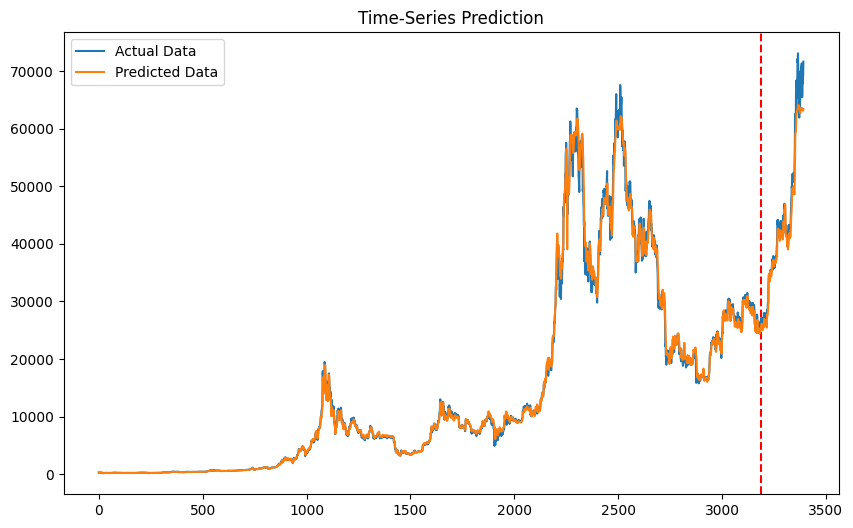

63357.824


In [55]:
import matplotlib.pyplot as plt

df_X_ss = ss.transform(hist.drop(columns=['Close'])) # old transformers
df_y_mm = mm.transform(hist.Close.values.reshape(-1, 1)) # old transformers
# split the sequence
df_X_ss, df_y_mm = split_sequences(df_X_ss, df_y_mm, 100, 50)
# converting to tensors
df_X_ss = torch.Tensor(df_X_ss)
df_y_mm = torch.Tensor(df_y_mm)
# reshaping the dataset
df_X_ss = torch.reshape(df_X_ss, (df_X_ss.shape[0], 100, df_X_ss.shape[2]))

train_predict = lstm(df_X_ss) # forward pass
data_predict = train_predict.data.numpy() # numpy conversion
dataY_plot = df_y_mm.data.numpy()

data_predict = mm.inverse_transform(data_predict) # reverse transformation

dataY_plot = mm.inverse_transform(dataY_plot)
true, preds = [], []
for i in range(len(dataY_plot)):
    true.append(dataY_plot[i][0])
for i in range(len(data_predict)):
    preds.append(data_predict[i][0])


plt.figure(figsize=(10,6)) #plotting
plt.axvline(x=train_test_cutoff, c='r', linestyle='--') # size of the training set

plt.plot(true, label='Actual Data') # actual plot
plt.plot(preds, label='Predicted Data') # predicted plot
plt.title('Time-Series Prediction')
plt.legend()
plt.savefig("whole_plot.png", dpi=300)
plt.show()

print(preds[-1])

# Bitcoin Price for Tommorrow

In [54]:
# Assuming df_X_ss and lstm are already defined and lstm is trained
# Get the last batch of the recent 100 days data
last_batch = df_X_ss[-1].reshape((1, 100, df_X_ss.shape[2]))

# Convert to tensor
last_batch_tensor = torch.Tensor(last_batch)

# Get the prediction
with torch.no_grad():
    lstm.eval()
    predicted_price_tensor = lstm(last_batch_tensor)
    predicted_price_numpy = predicted_price_tensor.data.numpy()

# Reverse the MinMax scaling
predicted_price = mm.inverse_transform(predicted_price_numpy)
print(f"Predicted Bitcoin price for tomorrow: {predicted_price[0][0]}")

Predicted Bitcoin price for tomorrow: 63357.8203125


# Model Evaluation

## RMSE

In [56]:
import torch

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Turn off gradients for validation, saves memory and computations
        predictions = model(X_test)
        # Calculate the RMSE loss
        mse = torch.mean((predictions - y_test)**2)  # Calculate mean squared error
        rmse = torch.sqrt(mse)  # Calculate the square root of the MSE to get RMSE
    return rmse.item()  # Return RMSE value

# Call the evaluate_model function
test_rmse = evaluate_model(lstm, X_test_tensors_final, y_test_tensors)
print(f"Test RMSE: {test_rmse}")


Test RMSE: 0.1619802564382553


## Test Loss

In [57]:
import torch

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Turn off gradients for validation, saves memory and computations
        predictions = model(X_test)
        # Calculate the loss
        loss_fn = torch.nn.MSELoss()
        loss = loss_fn(predictions, y_test)
    return loss.item()

# Call the evaluate_model function
test_loss = evaluate_model(lstm, X_test_tensors_final, y_test_tensors)
print(f"Test Loss: {test_loss}")


Test Loss: 0.02623760513961315


## MAE

In [58]:
import torch
from torch.nn.functional import l1_loss

# 'predictions' and 'true_values' are PyTorch tensors of the same shape
predictions = lstm(X_test_tensors_final)
true_values = y_test_tensors

# Calculate MAE
mae = l1_loss(predictions, true_values, reduction='mean').item()
print(f"Mean Absolute Error: {mae}")



Mean Absolute Error: 0.12192242592573166


## R-squared

In [59]:
from sklearn.metrics import r2_score

# lstm and X_test_tensors_final are already defined and lstm is trained
lstm.eval()  # Set the model to evaluation mode
y_pred = lstm(X_test_tensors_final)
y_pred_numpy = y_pred.data.numpy()

# y_test_tensors is the actual values tensor and mm is the MinMaxScaler
y_test_numpy = y_test_tensors.data.numpy()

# Inverse transform the scaled data to original scale
y_pred_rescaled = mm.inverse_transform(y_pred_numpy)
y_test_rescaled = mm.inverse_transform(y_test_numpy)

# Calculate R-squared
r_squared = r2_score(y_test_rescaled, y_pred_rescaled)
print(f"R-squared: {r_squared}")




R-squared: -0.13571092944314217


## MAPE

In [60]:
import torch

# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred, eps=1e-8):
    # Avoid division by zero
    y_true, y_pred = torch.tensor(y_true), torch.tensor(y_pred)
    mape = torch.mean(torch.abs((y_true - y_pred) / torch.clamp(y_true, min=eps)))
    return mape

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Turn off gradients for validation, saves memory and computations
        predictions = model(X_test)
        # Calculate the MAPE
        mape = mean_absolute_percentage_error(y_test, predictions)
    return mape.item()

# Call the evaluate_model function
test_mape = evaluate_model(lstm, X_test_tensors_final, y_test_tensors)
print(f"Test MAPE: {test_mape}")


Test MAPE: 0.1464759260416031
